In [ ]:
                                           LOGISTIC REGRESSION ASSIGNMENT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
#pickle.dump(log_reg, open("logistic_model.pkl", "wb"))import papd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Merge Data
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")
# Add a column to datasets
train["Dataset"] = "train"
test["Dataset"] = "test"


In [5]:
# Display settings
pd.set_option("display.max_columns", 20) 
sns.set(style="whitegrid", palette="muted")


In [6]:
df = pd.concat([train, test], ignore_index=True)
print("Merged dataset shape:", df.shape)
print(df.head())

Merged dataset shape: (1309, 2435)
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1       0.0       3  22.0      1      0   7.2500   
1            2       1.0       1  38.0      1      0  71.2833   
2            3       1.0       3  26.0      0      0   7.9250   
3            4       1.0       1  35.0      1      0  53.1000   
4            5       0.0       3  35.0      0      0   8.0500   

  Name_Abbing, Mr. Anthony Name_Abbott, Mr. Rossmore Edward  \
0                    False                            False   
1                    False                            False   
2                    False                            False   
3                    False                            False   
4                    False                            False   

  Name_Abbott, Mrs. Stanton (Rosa Hunt)  ... Cabin_D38 Cabin_D40 Cabin_D43  \
0                                 False  ...       NaN       NaN       NaN   
1                                 False

In [7]:
print("Train shape:", train.shape)
print("Test shape :", test.shape)
print("Merged shape:", df.shape)


Train shape: (891, 1732)
Test shape : (418, 869)
Merged shape: (1309, 2435)


In [8]:
#3. Exploratory Data Analysis (EDA)
print("\nSummary Statistics:\n", df.describe(include="all"))


Summary Statistics:
         PassengerId    Survived       Pclass          Age        SibSp  \
count   1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
unique          NaN         NaN          NaN          NaN          NaN   
top             NaN         NaN          NaN          NaN          NaN   
freq            NaN         NaN          NaN          NaN          NaN   
mean     655.000000    0.383838     2.294882    29.881138     0.498854   
std      378.020061    0.486592     0.837836    14.413493     1.041658   
min        1.000000    0.000000     1.000000     0.170000     0.000000   
25%      328.000000    0.000000     2.000000    21.000000     0.000000   
50%      655.000000    0.000000     3.000000    28.000000     0.000000   
75%      982.000000    1.000000     3.000000    39.000000     1.000000   
max     1309.000000    1.000000     3.000000    80.000000     8.000000   

              Parch         Fare Name_Abbing, Mr. Anthony  \
count   1309.000000  1308.00

In [9]:
df = pd.read_csv("Titanic_train.csv")
df = pd.read_csv("Titanic_test.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 868 entries, PassengerId to Embarked_S
dtypes: bool(862), float64(2), int64(4)
memory usage: 371.6 KB
None


In [10]:
print(df.columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Master. Eugene Joseph',
       'Name_Abelseth, Miss. Karen Marie',
       'Name_Abelseth, Mr. Olaus Jorgensen',
       'Name_Abrahamsson, Mr. Abraham August Johannes',
       ...
       'Cabin_F E46', 'Cabin_F E57', 'Cabin_F G63', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F4', 'Cabin_G6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=868)


In [11]:
print("Data Types:")
print(df.dtypes)

Data Types:
PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
                ...   
Cabin_F4          bool
Cabin_G6          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Length: 868, dtype: object


In [12]:
#statistical summary
print("Summary Statistics:")
(df.describe())


Summary Statistics:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# Drop unnecessary dummy columns
useful_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
df = df[[c for c in useful_cols if c in df.columns]]

print("\nClean dataset shape:", df.shape)
print(df.head())


Clean dataset shape: (418, 5)
   Pclass   Age  SibSp  Parch     Fare
0       3  34.5      0      0   7.8292
1       3  47.0      1      0   7.0000
2       2  62.0      0      0   9.6875
3       3  27.0      0      0   8.6625
4       3  22.0      1      1  12.2875


In [14]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing Age or Fare with median (if any)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())




Missing values per column:
Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


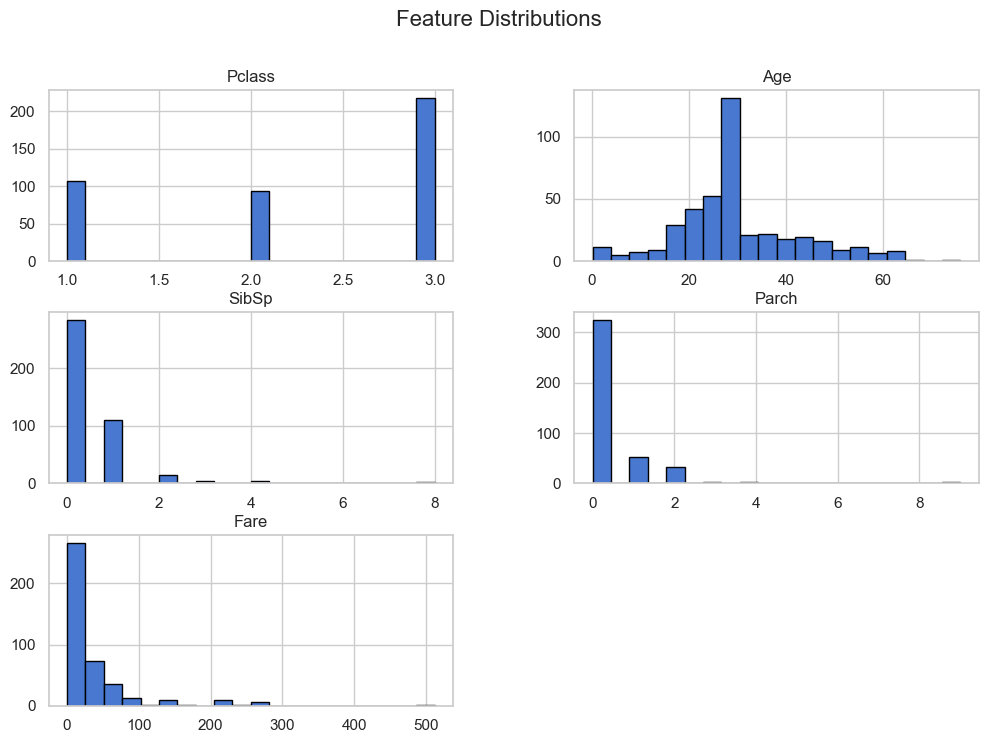

In [15]:
# Visualizations
# Histogram of numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

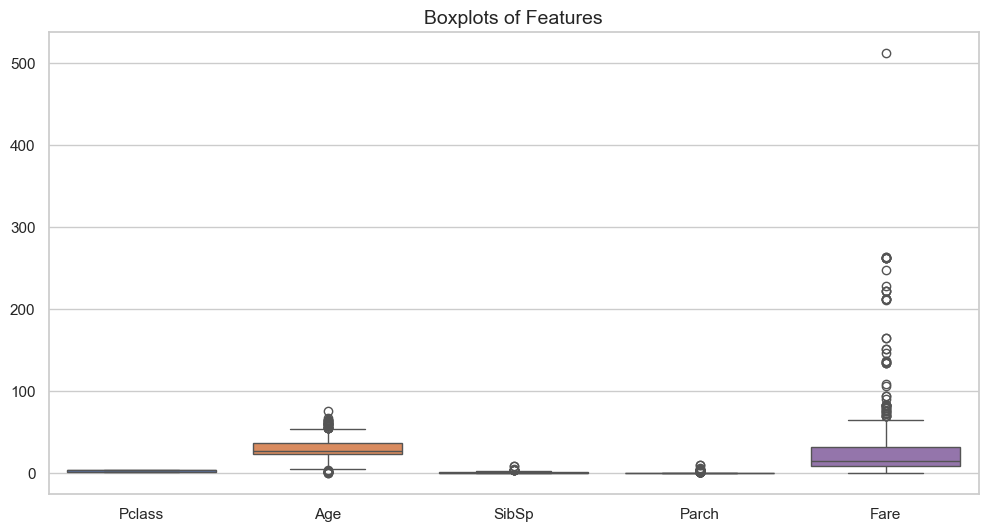

In [16]:
# Boxplots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Survived"], errors="ignore"))
plt.title("Boxplots of Features", fontsize=14)
plt.show()

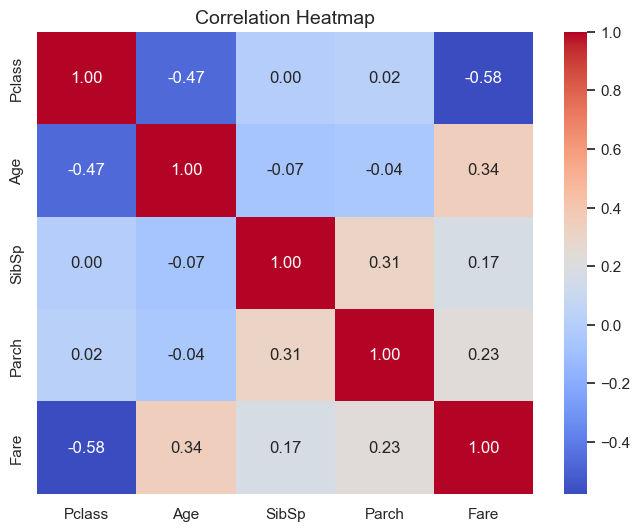

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [18]:
# Observations
print("\nCorrelation matrix:")
print(df.corr())


Correlation matrix:
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.467853  0.001087  0.018721 -0.577313
Age    -0.467853  1.000000 -0.071197 -0.043731  0.342357
SibSp   0.001087 -0.071197  1.000000  0.306895  0.171912
Parch   0.018721 -0.043731  0.306895  1.000000  0.230325
Fare   -0.577313  0.342357  0.171912  0.230325  1.000000


In [19]:
# data preprocessing
import pandas as pd
import numpy as np
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")
df = train.copy()

# Handle Missing Values
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Fare"] = df["Fare"].fillna(df["Fare"].median())
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])

print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
              ..
Cabin_G6       0
Cabin_T        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Length: 1731, dtype: int64


In [20]:
# Encode Categorical Variables
# Encode Sex (binary)
if "Sex" in df.columns:
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Encode Embarked (One-hot encoding)
if "Embarked" in df.columns:
    df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

print("\nColumns after encoding:\n", df.columns)


Columns after encoding:
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1731)


In [21]:
# Final Cleaned Data
print("\nCleaned dataset shape:", df.shape)
print(df.head())


Cleaned dataset shape: (891, 1731)
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                     False                             False   
1                     False                             False   
2                     False                             False   
3                     False                             False   
4                     False                             False   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  ...  Cabin_F G73  Cabin_F2  \
0                                  False  ...        False     False   
1                                  Fal

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train = pd.read_csv("Titanic_train.csv")
# Handle Missing Values

if "Age" in train.columns:
    train["Age"] = train["Age"].fillna(train["Age"].median())

if "Fare" in train.columns:
    train["Fare"] = train["Fare"].fillna(train["Fare"].median())

if "Embarked" in train.columns:
    train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

#  Drop Irrelevant Columns 
cols_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]
train = train.drop(columns=[c for c in cols_to_drop if c in train.columns])
#  Encode Categorical Variables
if "Sex" in train.columns:
    train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

if "Embarked" in train.columns:
    train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

#  Features & Target
X = train.drop(columns=["Survived"])
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#  Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 7. Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Evaluation
y_pred = model.predict(X_test_scaled)
print("✅ Training Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Training Accuracy: 1.0
✅ Test Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85       105
           1       0.90      0.61      0.73        74

    accuracy                           0.81       179
   macro avg       0.84      0.78      0.79       179
weighted avg       0.83      0.81      0.80       179


Confusion Matrix:
 [[100   5]
 [ 29  45]]


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # for ROC-AUC

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("✅ ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8100558659217877
✅ Precision: 0.9
✅ Recall: 0.6081081081081081
✅ F1 Score: 0.7258064516129032
✅ ROC-AUC: 0.9028314028314027

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85       105
           1       0.90      0.61      0.73        74

    accuracy                           0.81       179
   macro avg       0.84      0.78      0.79       179
weighted avg       0.83      0.81      0.80       179


Confusion Matrix:
 [[100   5]
 [ 29  45]]


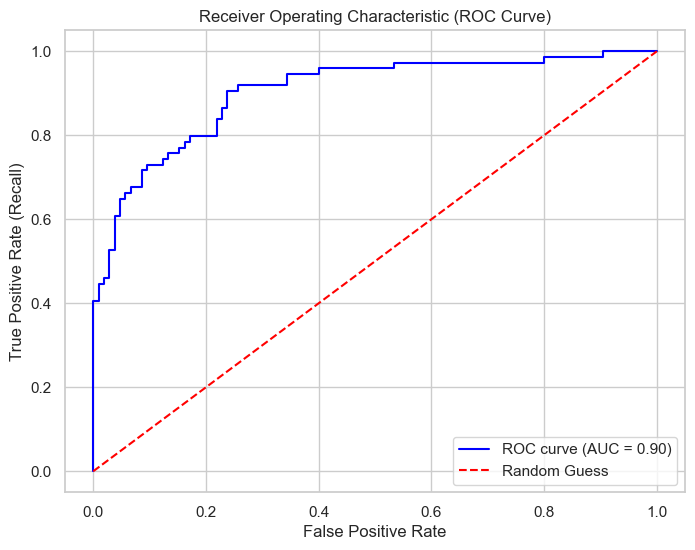

In [26]:
# ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [27]:
import numpy as np
import pandas as pd

# Get feature names (after encoding)
feature_names = X_train.columns  

# Get model coefficients
coefficients = model.coef_[0]

# Convert into a DataFrame for easier interpretation
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": np.exp(coefficients)  # exponentiate coefficients
}).sort_values(by="Odds Ratio", ascending=False)

print(coef_df)


                                                Feature  Coefficient  \
896                                          Sex_female     0.792367   
822                   Name_Tornquist, Mr. William Henry     0.296177   
4                                                  Fare     0.273010   
21                  Name_Allison, Master. Hudson Trevor     0.266977   
213                     Name_Dean, Master. Bertram Vere     0.242033   
...                                                 ...          ...   
23    Name_Allison, Mrs. Hudson J C (Bessie Waldo Da...    -0.198605   
1231                                      Ticket_347082    -0.205561   
22                    Name_Allison, Miss. Helen Loraine    -0.208918   
0                                                Pclass    -0.448902   
897                                            Sex_male    -0.792367   

      Odds Ratio  
896     2.208618  
822     1.344708  
4       1.313913  
21      1.306011  
213     1.273836  
...          ...  
23

In [8]:
# Save cleaned dataset for assignment
data.to_csv("Titanic_cleaned.csv", index=False)
st.success("Cleaned dataset saved as Titanic_cleaned.csv")


2025-09-16 21:38:27.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:38:27.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:38:27.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
INTERVIEW QUESTIONS

In [ ]:
1.DIFFERENCE OF PRECISION AND RECALL
PRECISION : it is predicted as positive in all items in the models, it focus on how accurate 
are positive values.
it is imp in when cost of false positive is high ex:email spam
here tp=true positive, fp = false positive
how right are positive i predicted.

precision = TP / (TP + FP)

In [ ]:
RECALL:in this out of all items that are actually positive ,how many did the model correctly identify
it focus on how well the model captures all positives.
it is imp in when cost of missing positive is high.
ex:cancer
how many actual positive did i catch.fn=false negatives

recall = TP / (TP + FN)

In [ ]:
2.CROSS-VALIDATION:Cross-validation is a technique used to evaluate how well a model generalizes ,Instead of training and testing the model once, 
the data is split into multiple folds, and the model is trained and tested multiple times.
it split dataset into k equal parts
for each fold train k-1 values
avg results across all folds.

IMP IN BINARY CLASSIFICATION:
Avoids Overfitting :A single train-test split might make the model look too good Cross-validation ensures the model is tested on different parts
of the data.
More Reliable Evaluation:Instead of one accuracy/precision/recall, you get an average performance score.This gives a better estimate of how the
model will perform on unseen data.Works Well on Small Datasets
In binary classification, sometimes data is limited.
Cross-validation makes better use of all data for both training and testing.
Cross-validation spreads the imbalance across folds, giving a fairer evaluation.

In [29]:
from sklearn.linear_model import LogisticRegression

# Assuming prepared X (features) and y (target)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)   

LogisticRegression(max_iter=1000)

In [31]:
import pickle

# Save trained model
pickle.dump(log_reg, open("logistic_model.pkl", "wb"))
print("✅ Model saved as logistic_model.pkl")


✅ Model saved as logistic_model.pkl


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
# Load dataset
train = pd.read_csv("Titanic_train.csv")
# Preprocessing
# Handle missing values for columns
essential_cols = ["Pclass", "Age", "Fare", "SibSp", "Parch"]
train = train.dropna(subset=essential_cols)

if "Sex" in train.columns:
    train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
    features = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex"]
elif "Sex_female" in train.columns:
    features = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex_female"]
else:
    raise KeyError("Neither 'Sex' nor 'Sex_female' found in dataset!")

# Target
X = train[features]
y = train["Survived"]

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Save trained model
pickle.dump(log_reg, open("logistic_regression_assignment.pkl", "wb"))
print("✅ Model saved as logistic_regression_assignment.pkl")

✅ Model saved as logistic_regression_assignment.pkl


## Streamlit Deployment Instructions

The logistic regression model is trained in this notebook. To deploy it using Streamlit:

 Save the trained model (pickle file) locally:
```python
import pickle
pickle.dump(log_reg, open("logistic_regression_assignment.pkl", "wb"))
